 Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns
were based on phone calls. Often, more than one contact tothe same client was required, in order to access if the product(bank term deposit) would be ('yes') or not ('no') subscribed.

Domain:
Banking
Context:

Leveraging customer information is paramount for mostbusinesses. In the case of a bank, attributes of customers like
the ones mentioned below can be crucial in strategizing amarketing campaign when launching a new product.
Attribute Information:
1. age (numeric)

2. job : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','manage
ment','retired','self-employed','services','student','technicia
n','unemployed','unknown')

3. marital : marital status (categorical:
'divorced','married','single','unknown'; note: 'divorced'
means divorced or widowed)

4. education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','profes
sional.course','university.degree','unknown')

5. default: has credit in default? (categorical:
'no','yes','unknown')

6. balance: average yearly balance, in euros (numeric)

7. housing: has housing loan? (categorical:
'no','yes','unknown')

8. loan: has personal loan? (categorical: 'no','yes','unknown')

9. contact: contact communication type (categorical:
'cellular','telephone')

10. day: last contact day of the month (numeric 1 -31)

11.month: last contact month of year (categorical: 'jan', 'feb',
'mar', ..., 'nov', 'dec')

12. duration: last contact duration, in seconds (numeric).
Important note: this attribute highly affects the output
target (e.g., if duration=0 then y='no'). Yet, the duration is
not known before a call is performed. Also, after the end
of the call y is obviously known. Thus, this input should
only be included for benchmark purposes and should be
discarded if the intention is to have a realistic predictive
model.

13. campaign: number of contacts performed during this
campaign and for this client (numeric, includes last
contact)

14. pdays: number of days that passed by after the client
was last contacted from a previous campaign (numeric;
999 means client was not previously contacted)

15.previous: number of contacts performed before this
campaign and for this client (numeric)

16. poutcome: outcome of the previous marketing
campaign (categorical: 'failure','nonexistent','success')

17.target: has the client subscribed a term deposit? (binary:
"yes","no")

Learning Outcomes:
● Exploratory Data Analysis
● Preparing the data to train a model
● Training and making predictions using an Ensemble

Model
● Tuning an Ensemble model

Objective:
The classification goal is to predict if the client will subscribe
(yes/no) a term deposit (variable y).
Steps and tasks:
1. Import the necessary libraries
2. Read the data as a data frame
3. Perform basic EDA which should include the following
and print out your insights at every step.
a. Shape of the data
b. Data type of each attribute
c. Checking the presence of missing values
d. 5 point summary of numerical attributes
e. Checking the presence of outliers
4. Prepare the data to train a model – check if data types are
appropriate, get rid of the missing values etc
5. Train a few standard classification algorithms, note and
comment on their performances along different metrics.
6. Build the ensemble models and compare the results with
the base models. Note: Random forest can be used only
with Decision trees.
7. Compare performances of all the models


In [1]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import system
from IPython.display import Image

num_bins = 10

In [2]:
Data = pd.read_csv('bank-full.csv')

In [3]:
Data.shape

(45211, 17)

In [4]:
Data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


Data Types --> object type values are need to be converted to quantitative variables


In [5]:
#Checking missing values

bool=Data.isnull().values.any()

# Observation
if bool:
    print('There are missing/null values in the data set')
else:
    print('There are no missing/null values in the data set')

There are no missing/null values in the data set


In [6]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
Data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
Data[Data['pdays']==-1].shape

(36954, 17)

In [9]:
Data[Data['pdays']==999].shape

(0, 17)

In [10]:
Data[Data['balance']<0].shape

(3766, 17)

In [11]:
Data['balance'].min()

-8019

In [12]:
Data[Data['balance']< 0].nunique

<bound method DataFrame.nunique of        age            job   marital  education default  balance housing loan  \
25      44         admin.   married  secondary      no     -372     yes   no   
28      46     management    single  secondary      no     -246     yes   no   
36      25    blue-collar   married  secondary      no       -7     yes   no   
37      53     technician   married  secondary      no       -3      no   no   
45      36         admin.    single    primary      no     -171     yes   no   
46      58  self-employed   married   tertiary      no     -364     yes   no   
51      48     management  divorced   tertiary      no     -244     yes   no   
53      42         admin.    single  secondary      no      -76     yes   no   
54      24     technician    single  secondary      no     -103     yes  yes   
94      57   entrepreneur  divorced  secondary      no      -37      no   no   
100     44    blue-collar   married  secondary      no     -674     yes   no   
112  

Taking balance as it is as in real scenerio bank account can have negative balance

In [13]:
#df = pd.DataFrame(Data)
#balance= abs(Data['balance'])
#pdays = abs(Data['pdays']).apply()
#Data['balance'] = balance
#Data['pdays'] = pdays
#Data.head()
#df.drop(["balance", "pdays"], axis=1,inplace= True) 

In [14]:
def eps(x):
    if x==-1:
        return np.finfo(float).eps
    else:
        return x

Data['pdays']=Data['pdays'].apply(eps)



Data.tail(50)
#np.finfo(float).eps

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45161,31,management,married,tertiary,no,720,yes,no,cellular,9,nov,94,3,2.220446e-16,0,unknown,no
45162,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,9.100000e+01,3,success,yes
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,379,2,9.200000e+01,3,failure,no
45164,35,services,married,tertiary,no,4655,no,no,cellular,9,nov,111,2,2.220446e-16,0,unknown,no
45165,33,technician,married,tertiary,no,2976,yes,no,cellular,9,nov,465,2,9.500000e+01,12,other,no
45166,41,unemployed,single,tertiary,no,79,no,no,telephone,9,nov,394,1,3.900000e+02,2,success,yes
45167,48,admin.,married,secondary,no,178,no,no,cellular,10,nov,228,1,2.220446e-16,0,unknown,no
45168,62,retired,married,tertiary,no,2557,yes,no,cellular,10,nov,404,1,5.700000e+01,8,success,yes
45169,31,management,married,tertiary,no,2994,yes,no,cellular,10,nov,182,1,2.290000e+02,2,failure,no
45170,19,student,single,primary,no,245,no,no,telephone,10,nov,98,2,1.100000e+02,2,other,no


Expanation:
    
pdays: number of days that passed by after the client was last contacted from 
a previous campaign (numeric; 999 means client was not previously contacted)

Inferences:

1. There is no value 999 in dataset.
2. So I checked for -1 and found that there were 36954 rows having data -1. 
So considering thatsuch a huge number of data is cannot be a bad data.

Result:

After considering above inferences I assumed that -1 should means client was not previously contacted. 

Action:
    
1. Taking  absolute value of -1 would have changed the meaning of data it would have mean that client
was contacted 1 day before.

2. Also putting0 means that client has been contacted today.

3. So to overcome this problem I replaced value -1 to epsilon which is very very smll number.


Balance also have negative value but considering real scenerio balance can be negative also. So taking negative values also.

In [15]:
#As per problem statement:
#this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
#Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
#Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have 
#a realistic predictive model.

Data.drop(["duration"], axis=1,inplace= True)  

#Checking the presence of outliers
Observation :
    
Quantitative variables :
    Age
    Balance
    day
    campaign
    pdays
    previous

Categorical variables (will be converted in 1/0 numerical format) :
    job
    marital 
    education 
    default
    housing
    loan
    contact
    month
    poutcome
    

Target Variable :
    Target

-------------------------------------------------------------------------------------------------

Understanding Q --> Q relationships

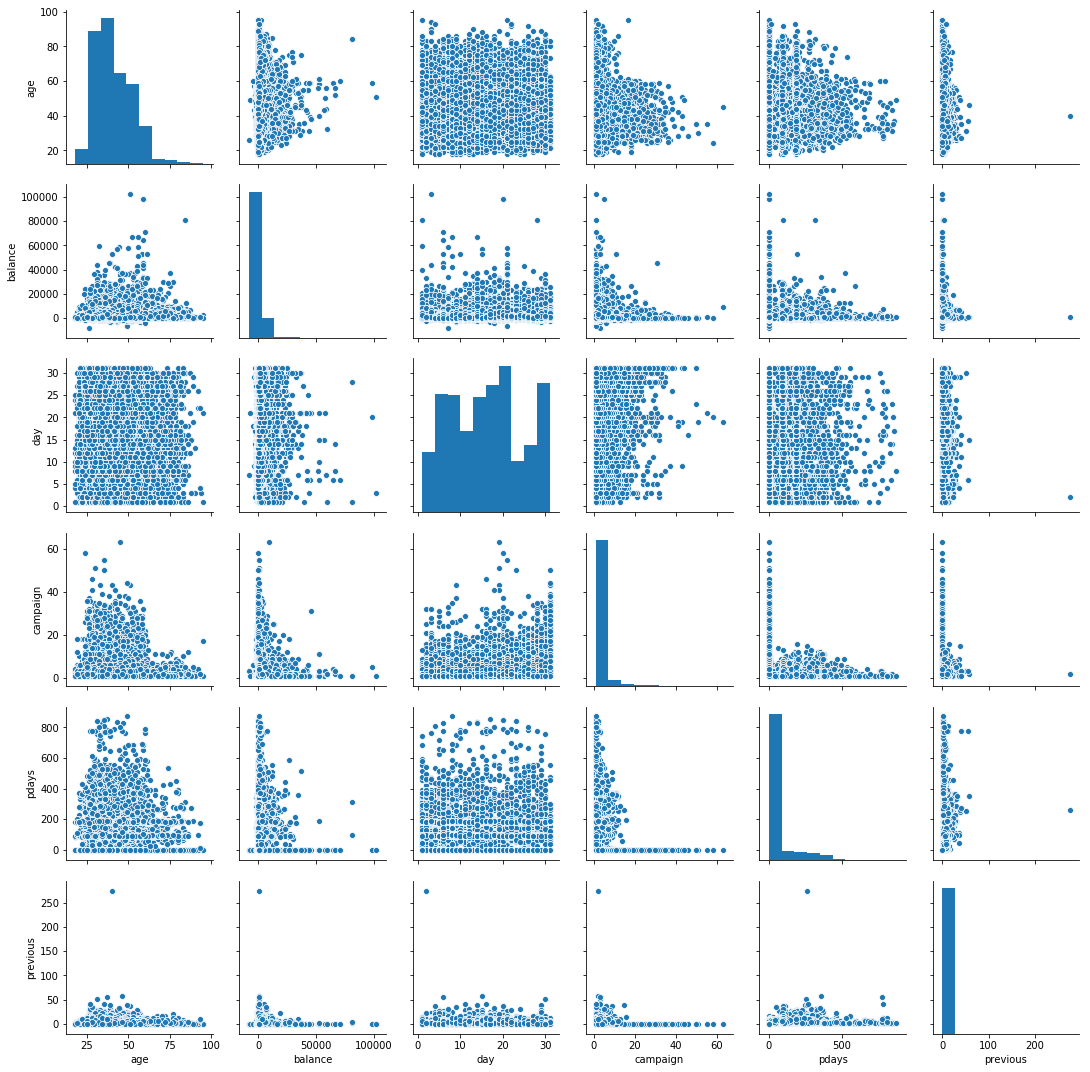

In [16]:
sns.pairplot(Data[['age','balance','day','campaign','pdays','previous']])

# Understanding C --> Q relationships
Let us explore more relationships of all Q variables 

1.Get the next Q variable and plot against Target.

2.If no specific correlation found add hue for other C variables to see if it reveals any relationship.
.
3.If specific correlation found,plot the same Q against this C variable with Hue of Personal Loan

Below lines of code provide a way to generate all the all box plot programatically for analysis


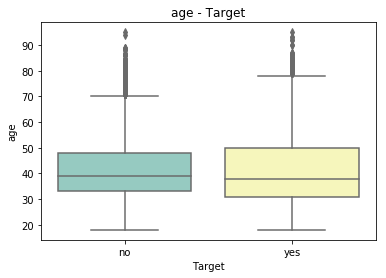

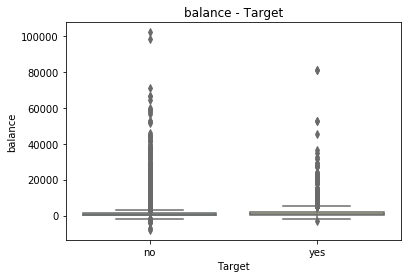

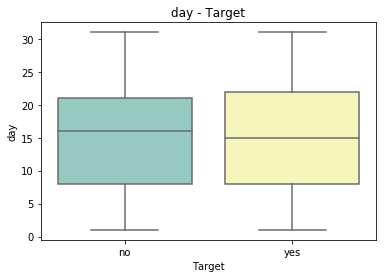

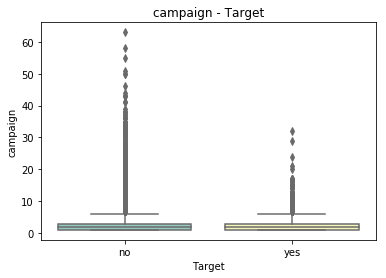

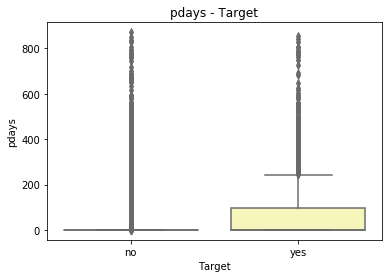

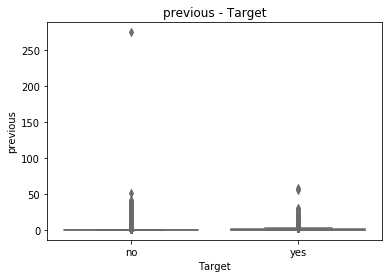

In [17]:
# 1.Get the next Q variable and plot against Personal Loan

for j in ['age','balance','day','campaign','pdays','previous']:
    plt.figure()
    plt.title(j+" - Target" )
    sns.boxplot(y=j,x='Target',data=Data, palette = 'Set3')

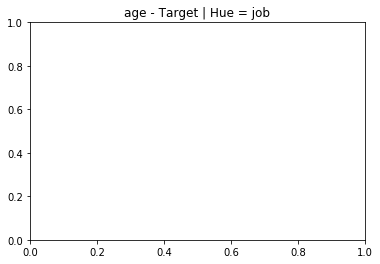

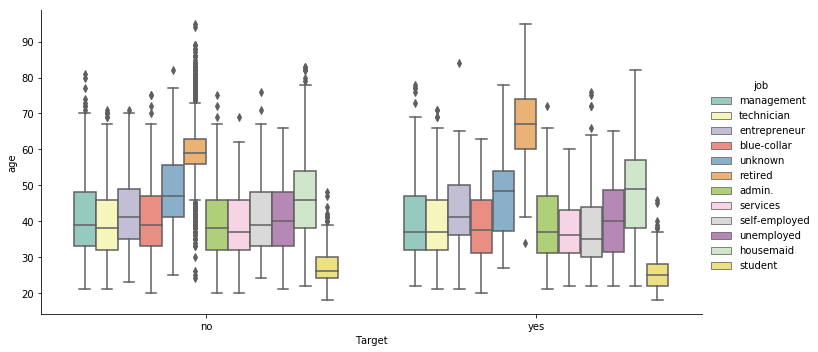

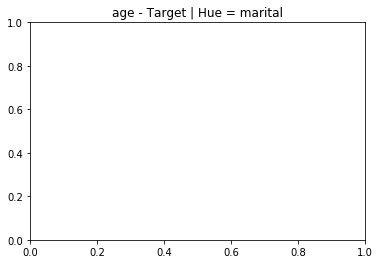

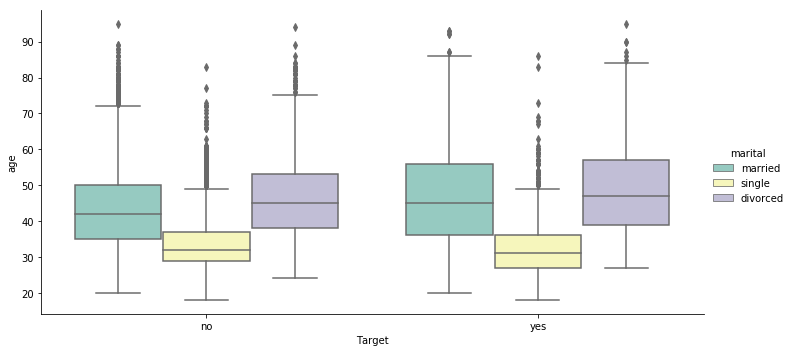

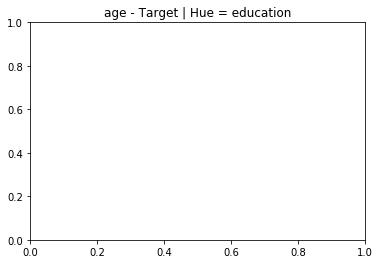

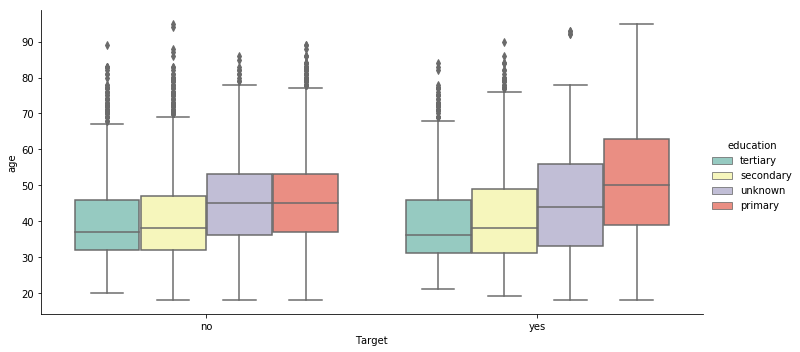

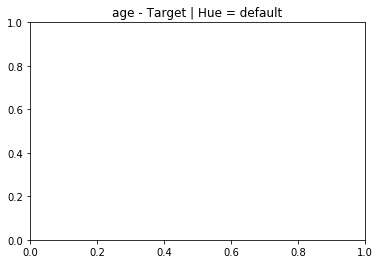

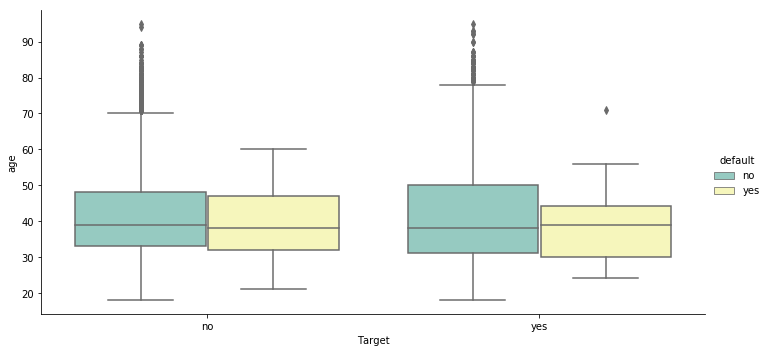

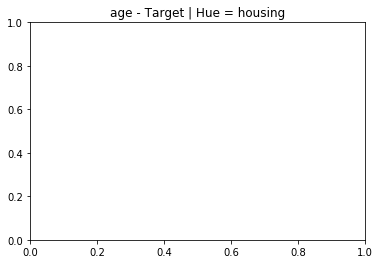

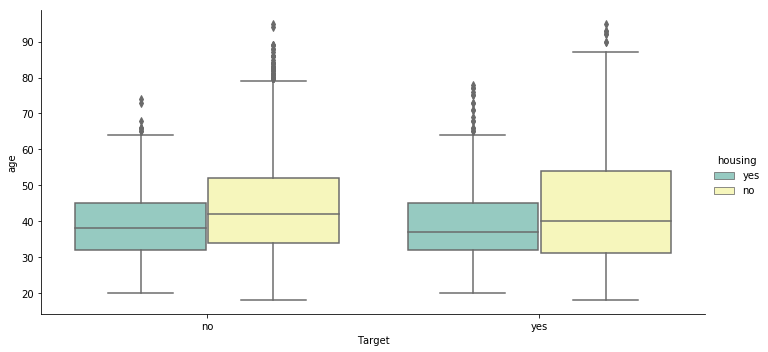

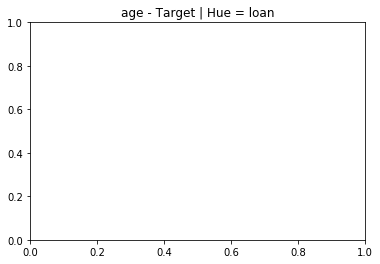

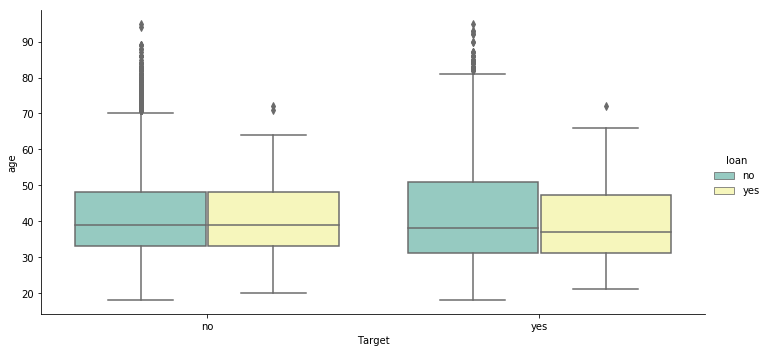

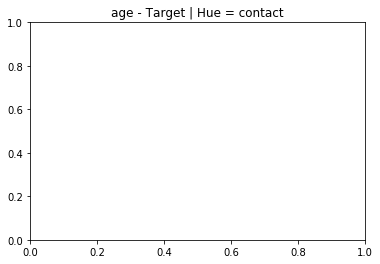

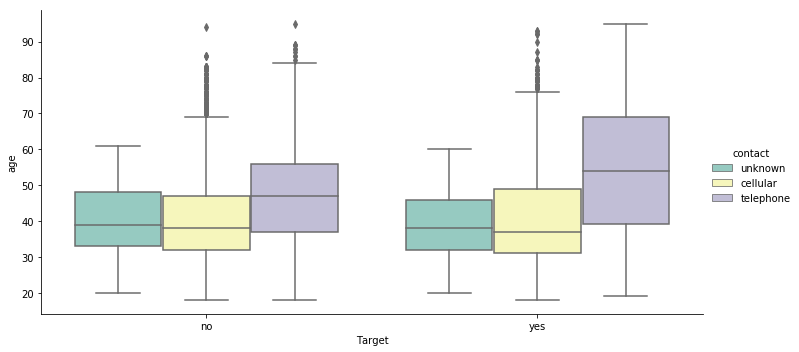

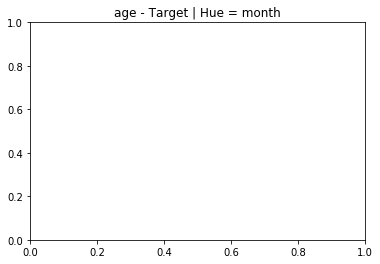

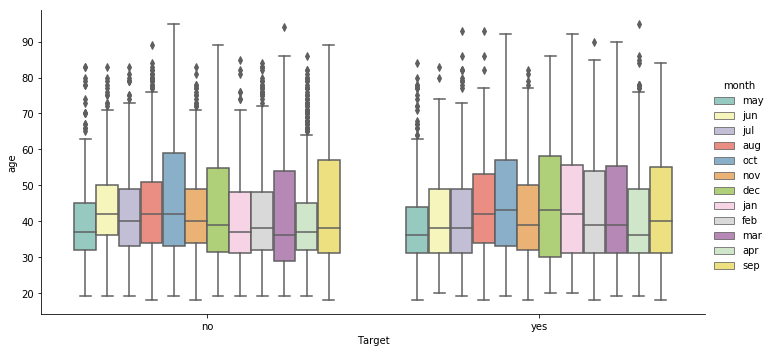

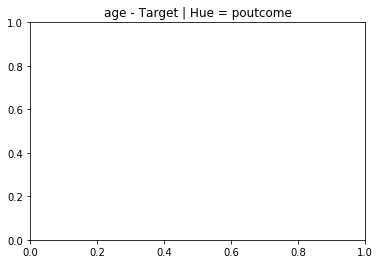

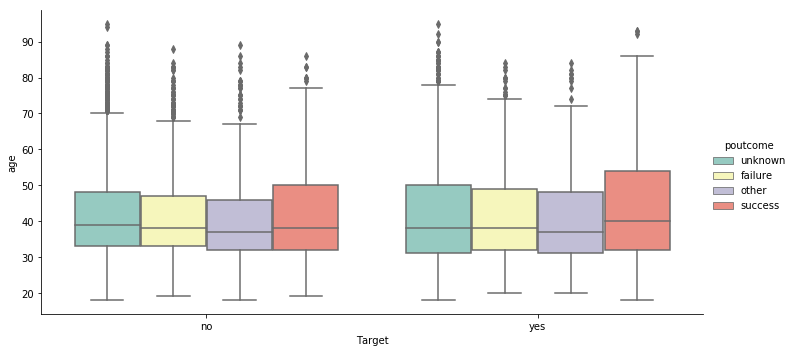

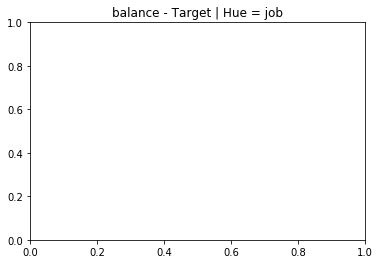

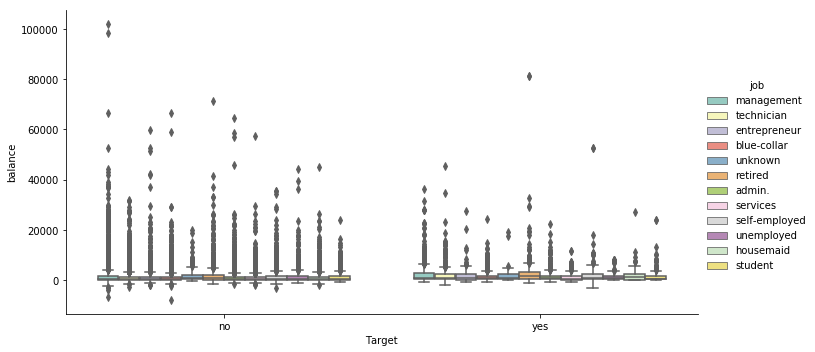

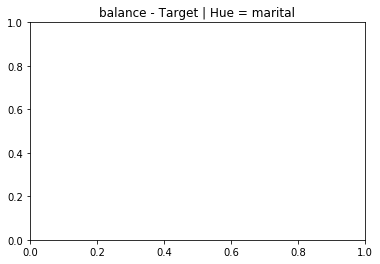

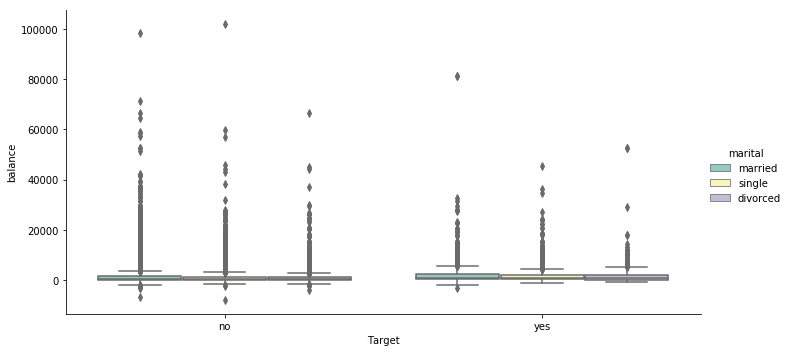

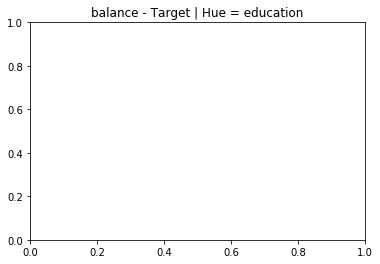

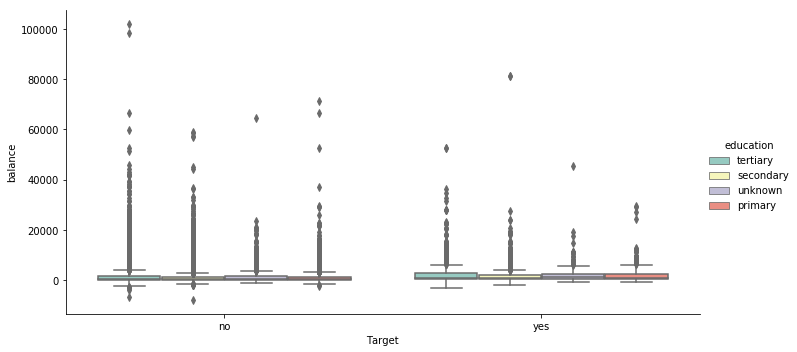

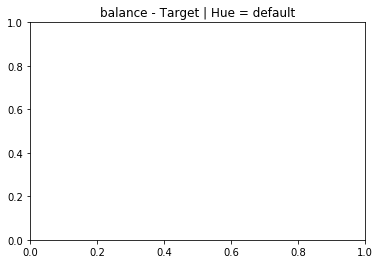

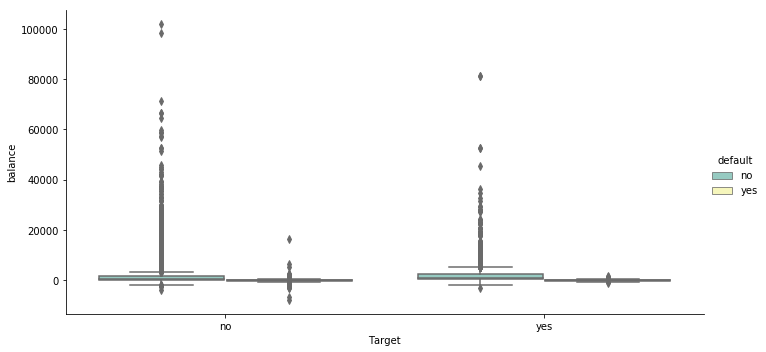

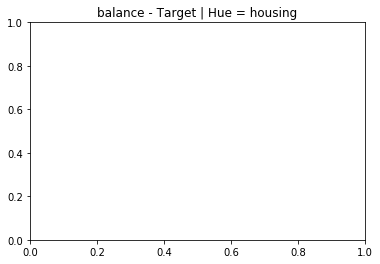

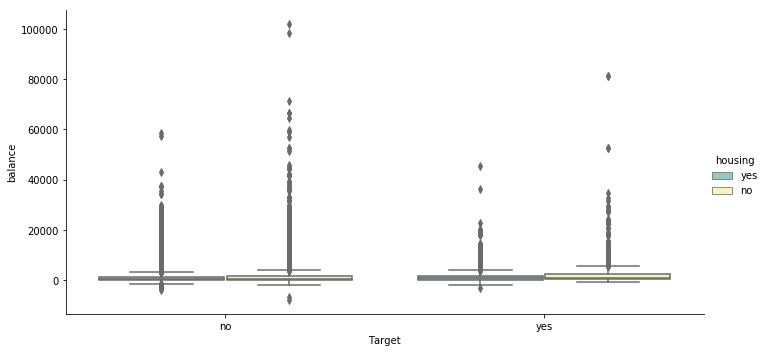

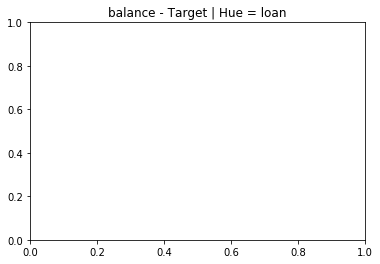

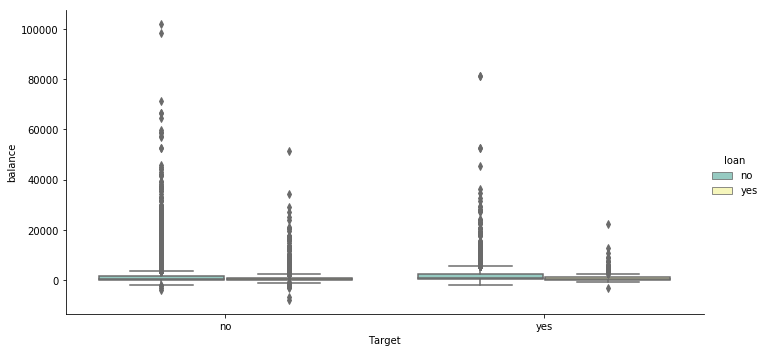

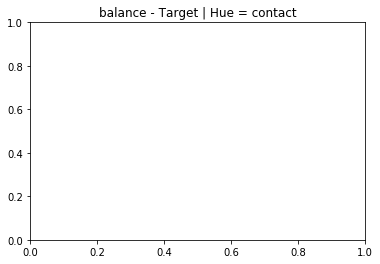

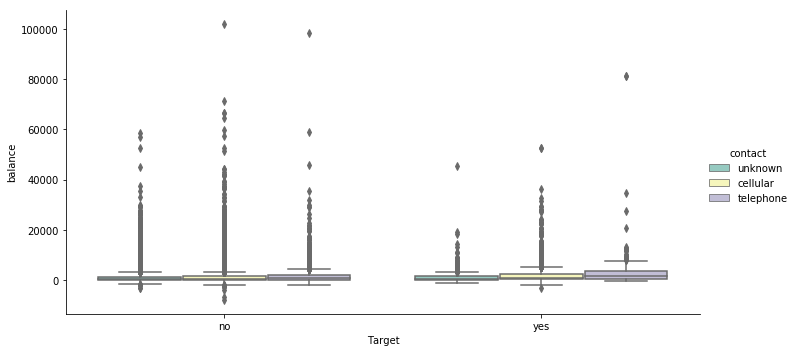

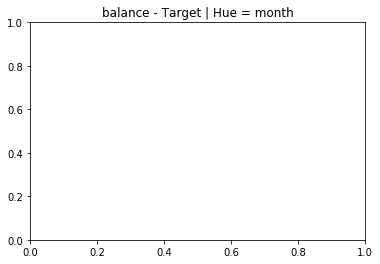

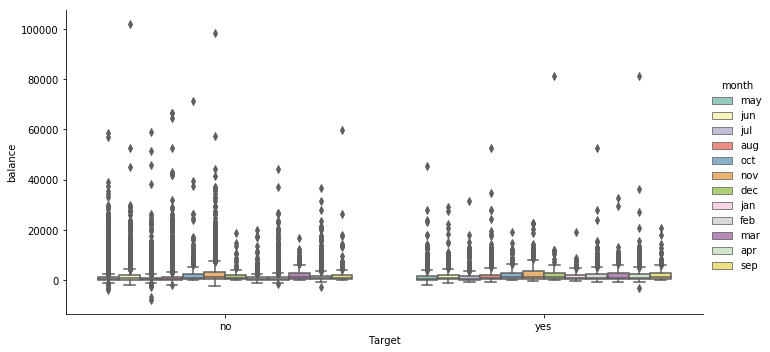

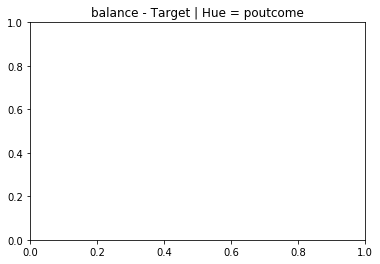

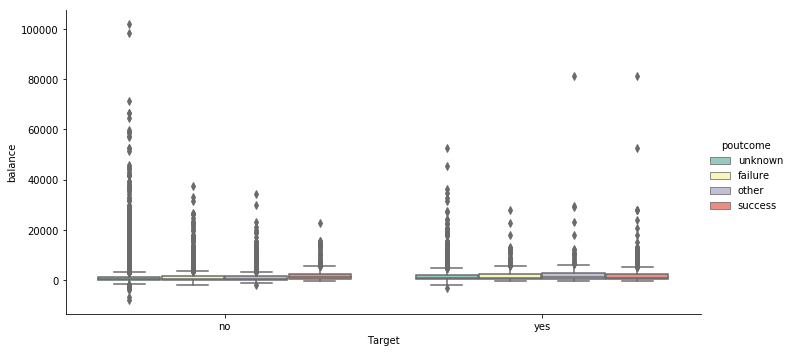

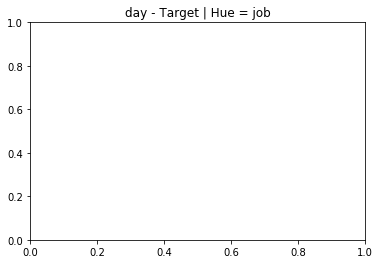

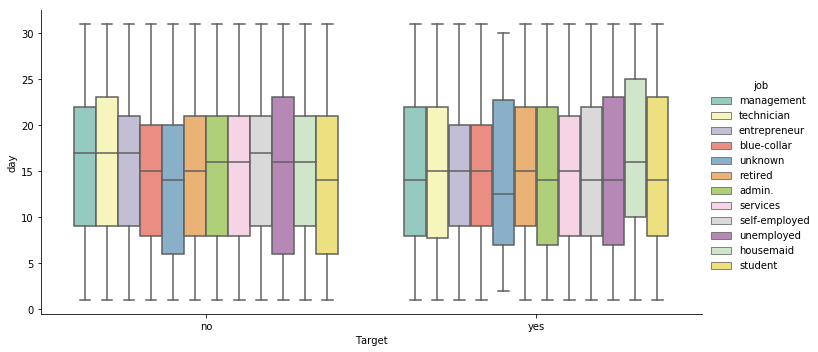

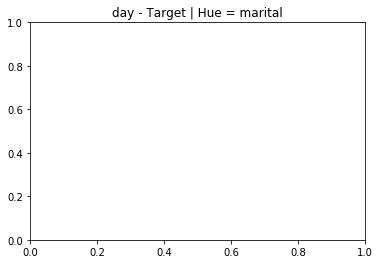

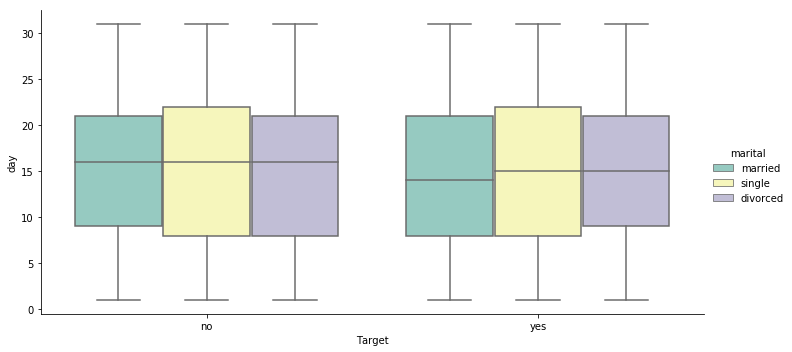

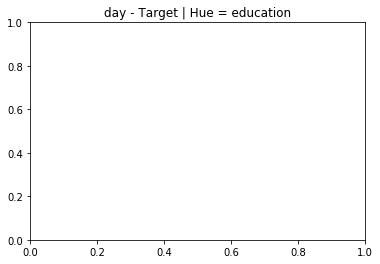

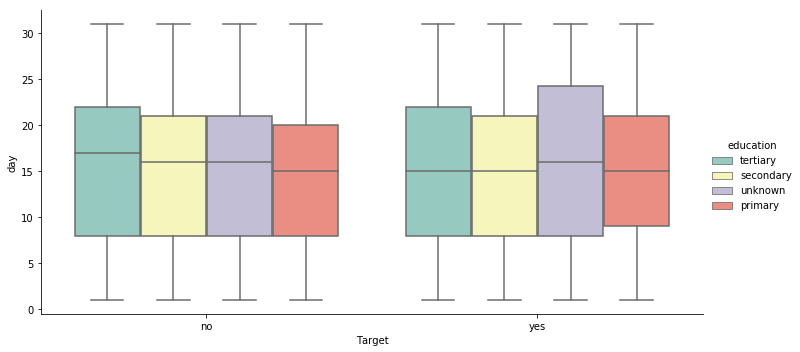

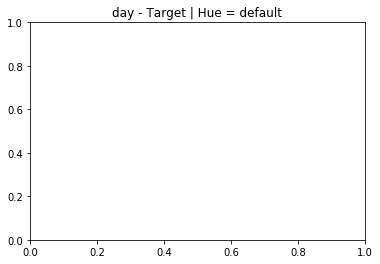

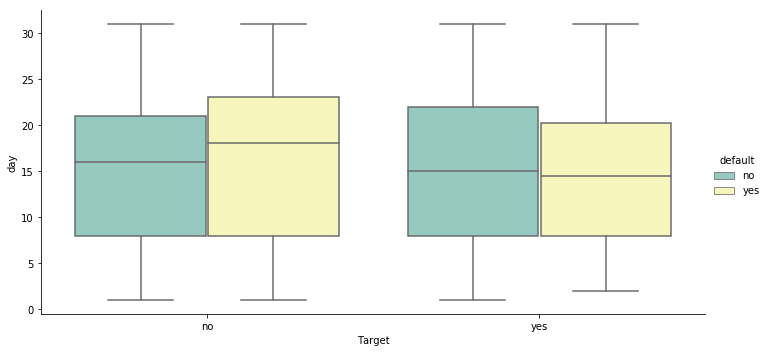

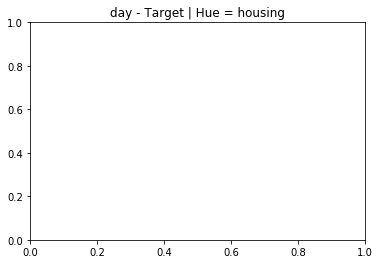

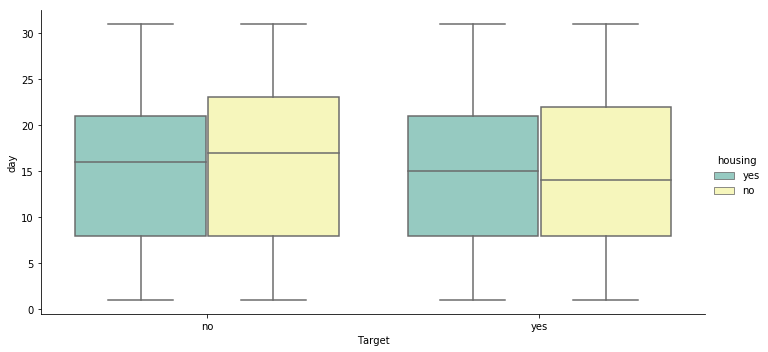

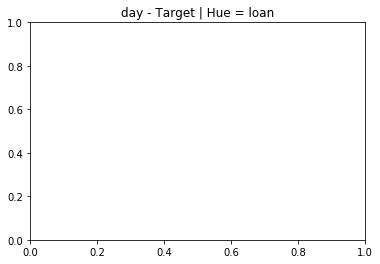

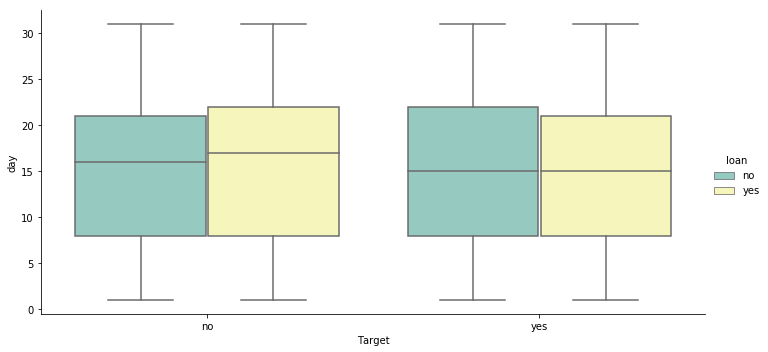

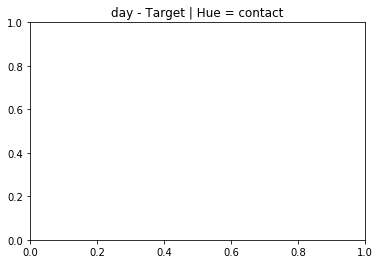

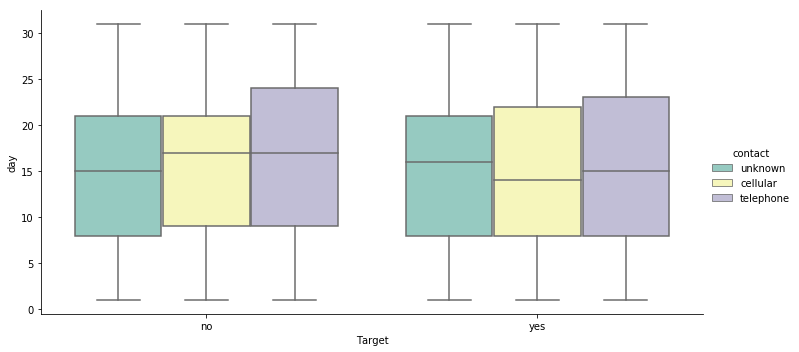

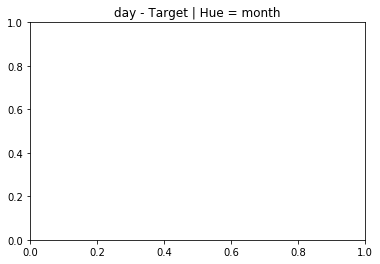

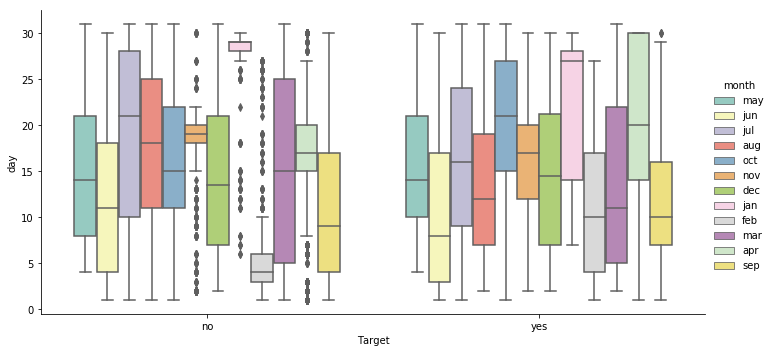

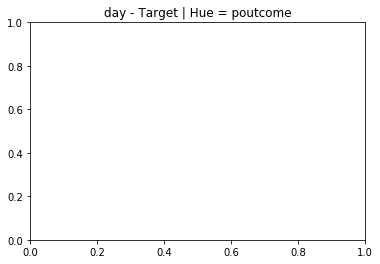

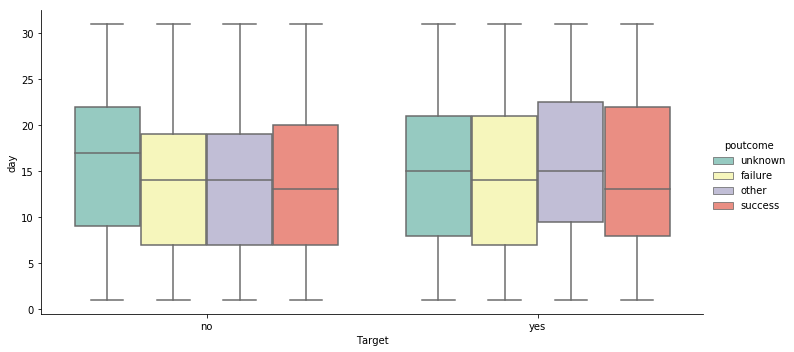

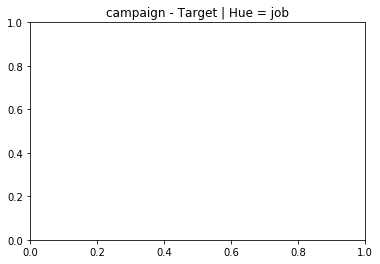

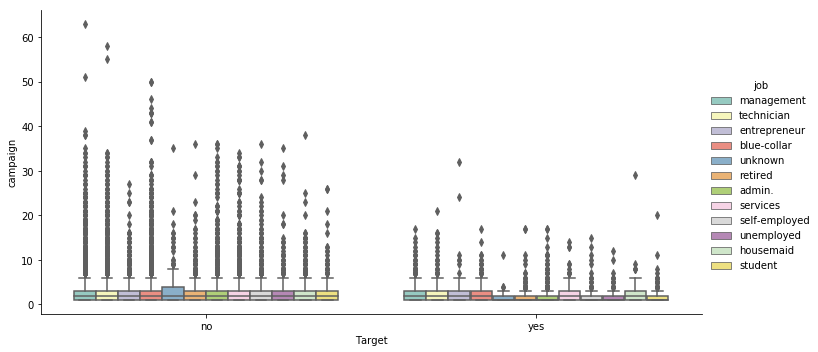

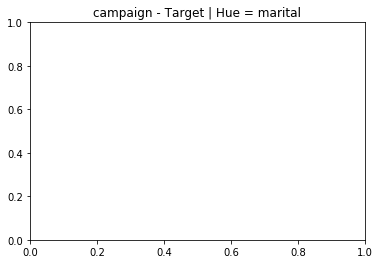

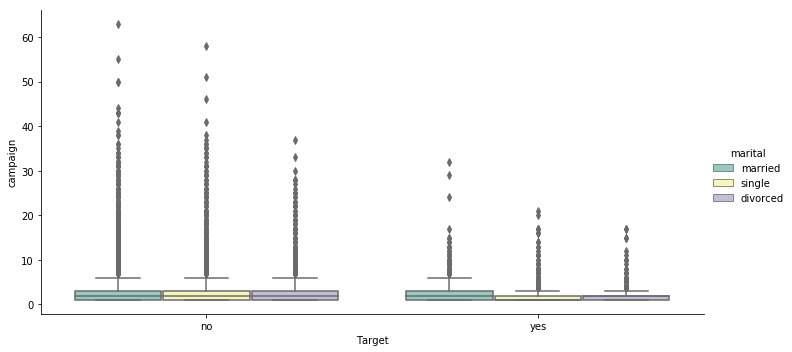

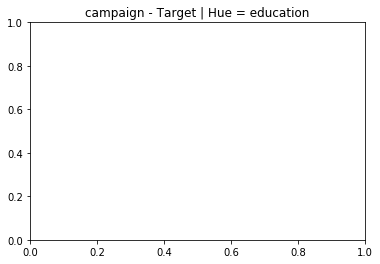

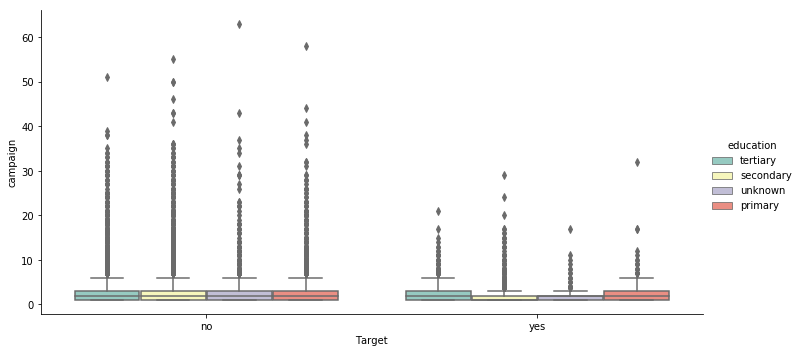

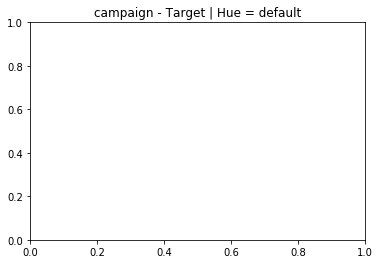

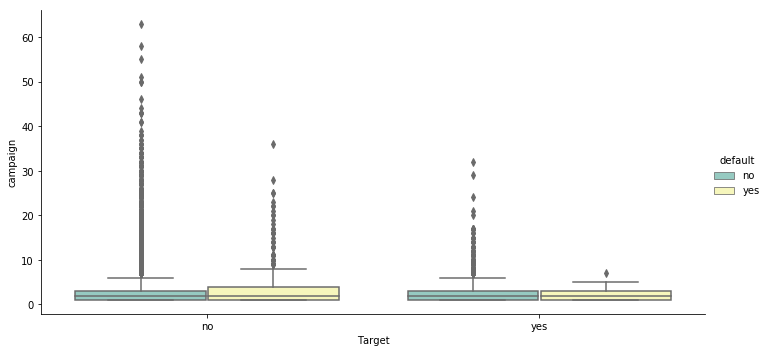

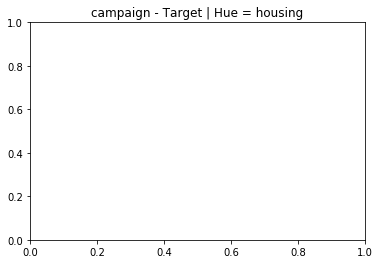

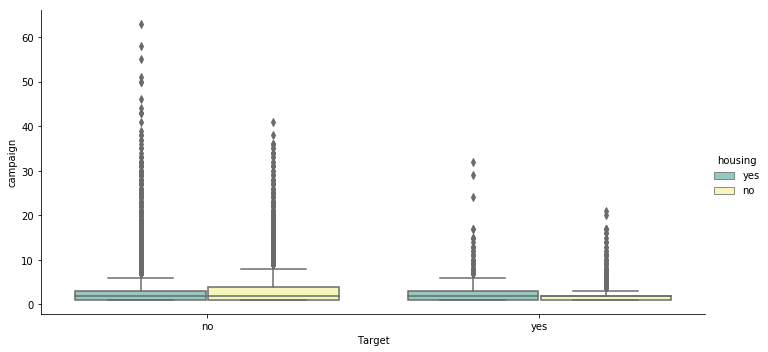

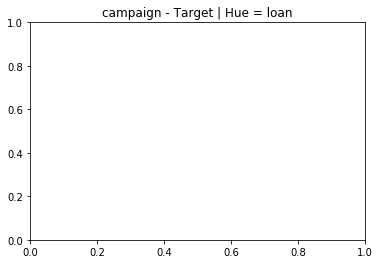

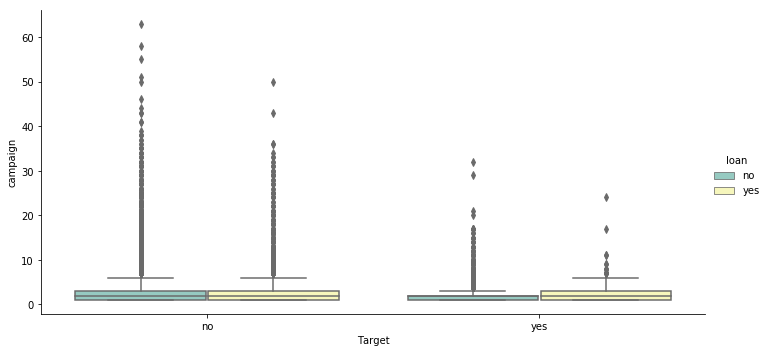

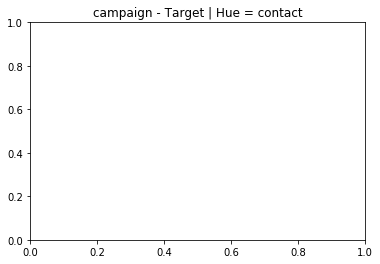

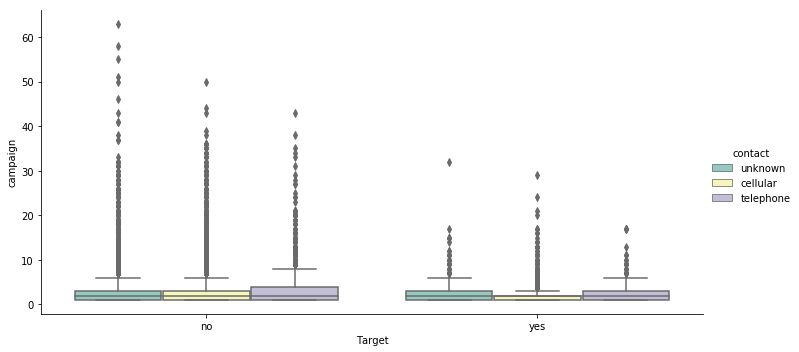

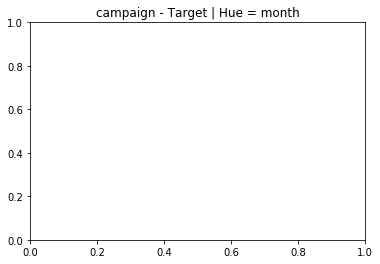

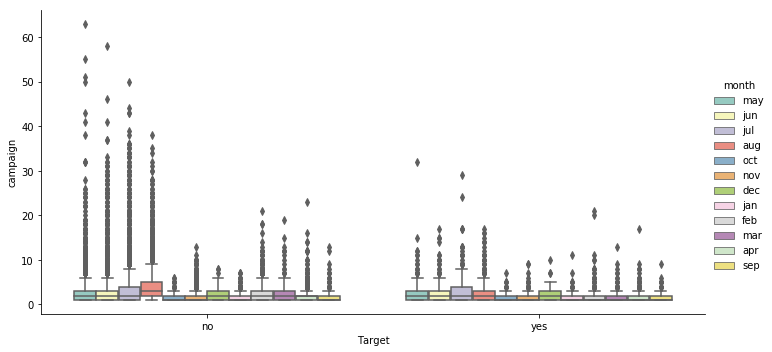

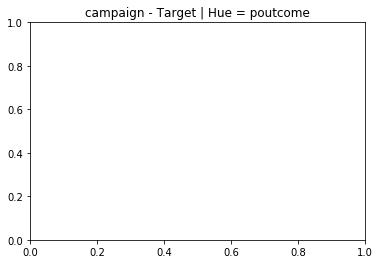

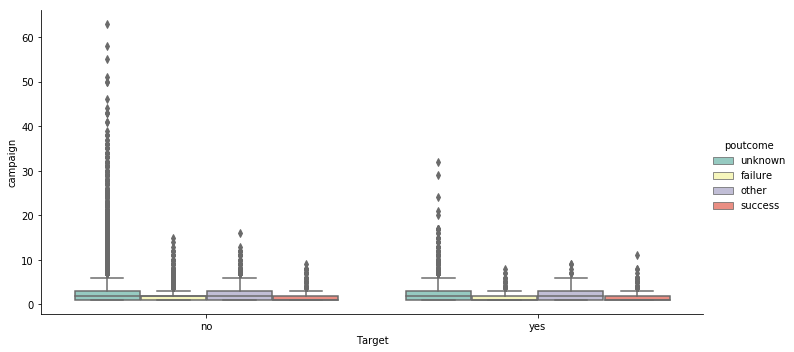

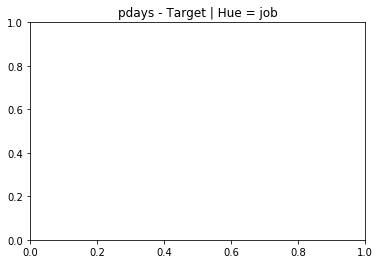

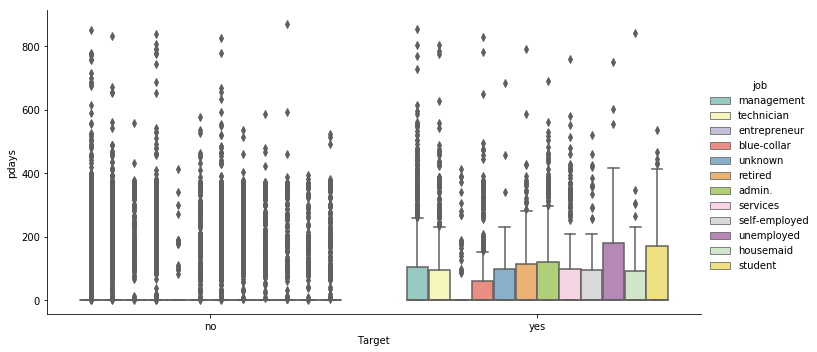

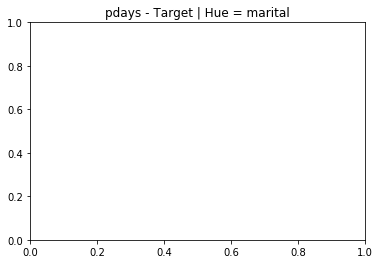

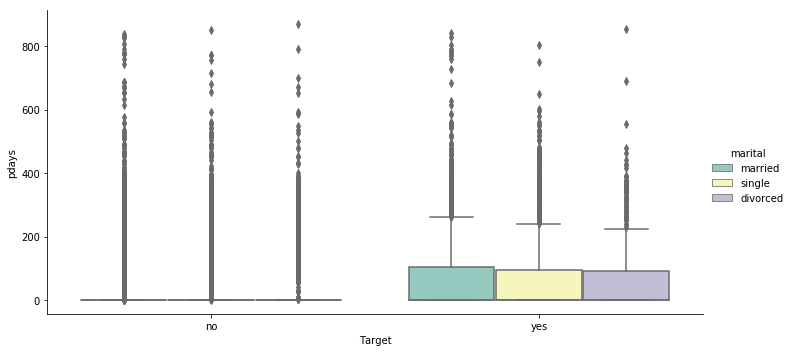

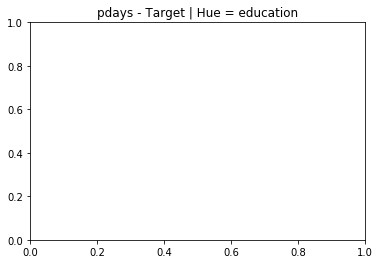

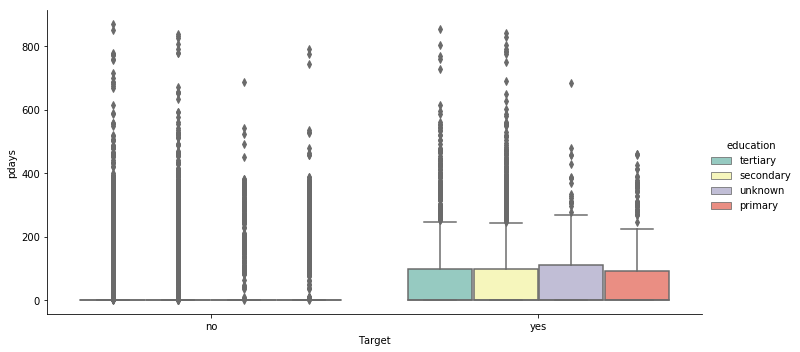

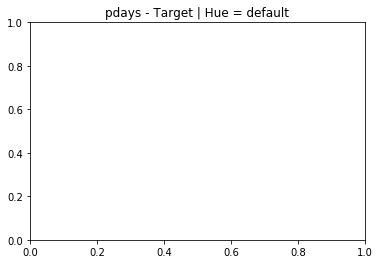

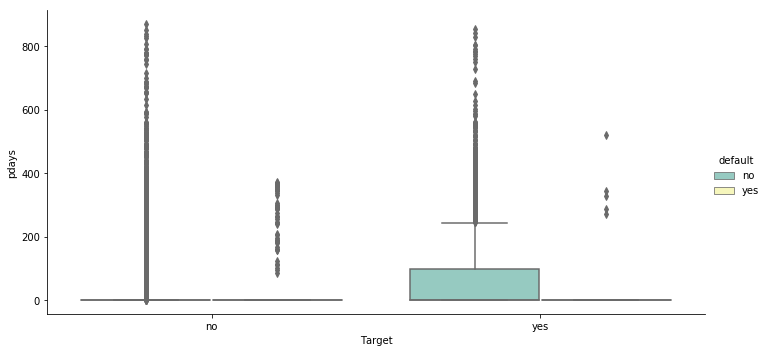

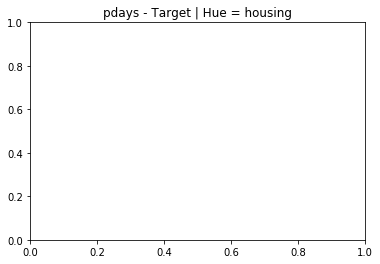

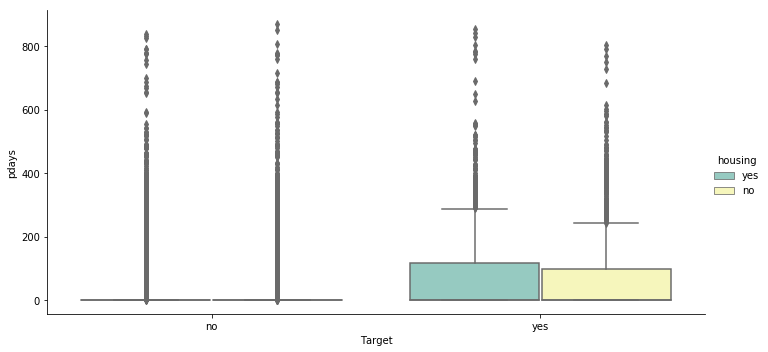

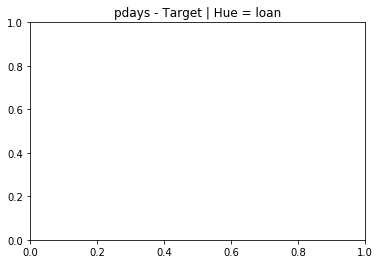

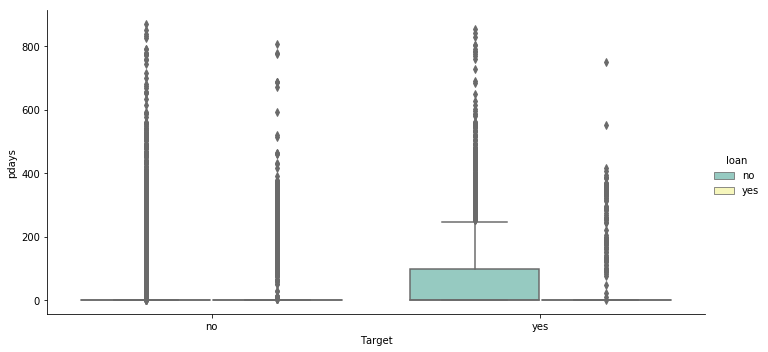

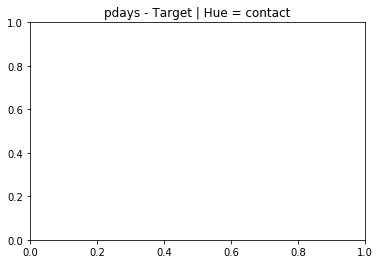

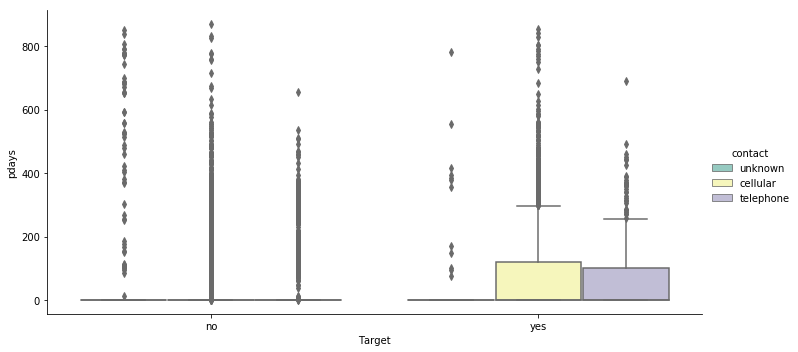

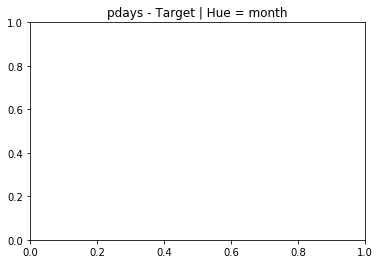

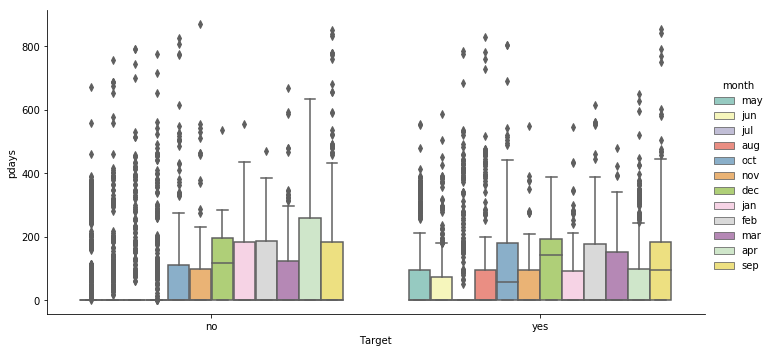

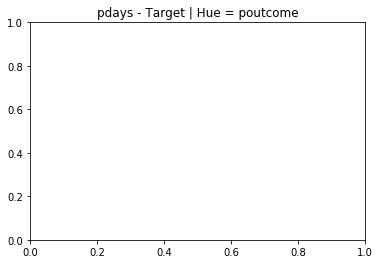

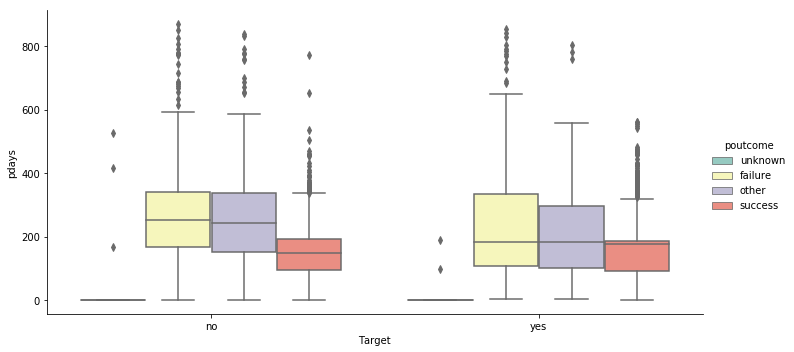

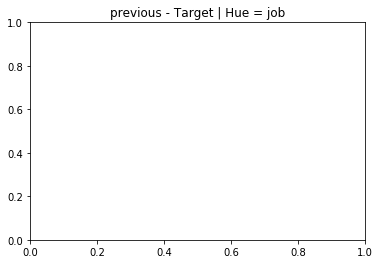

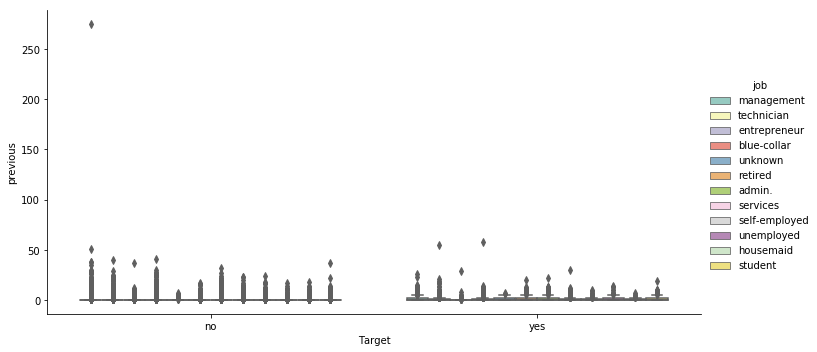

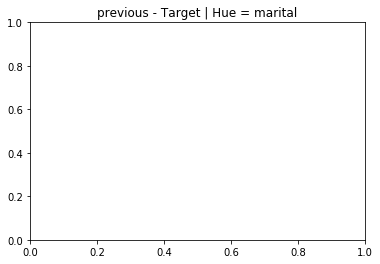

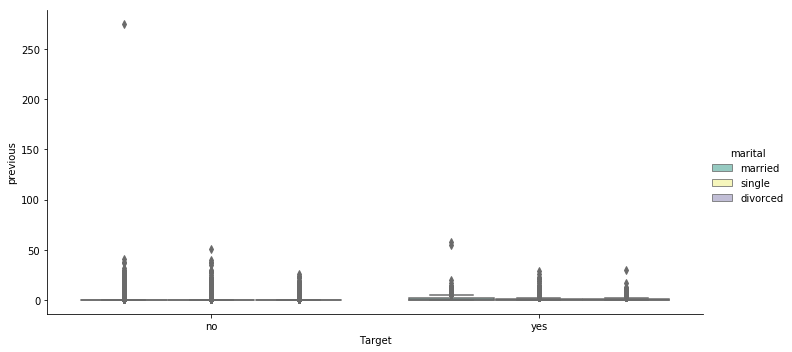

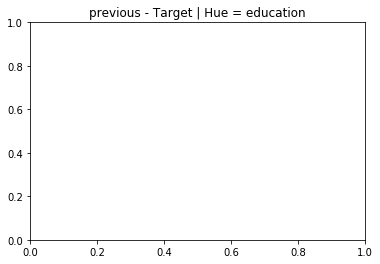

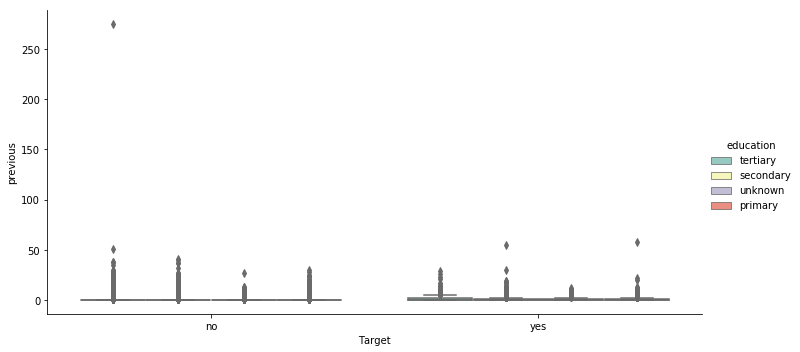

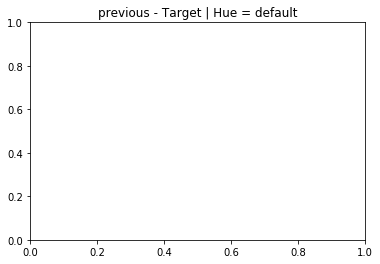

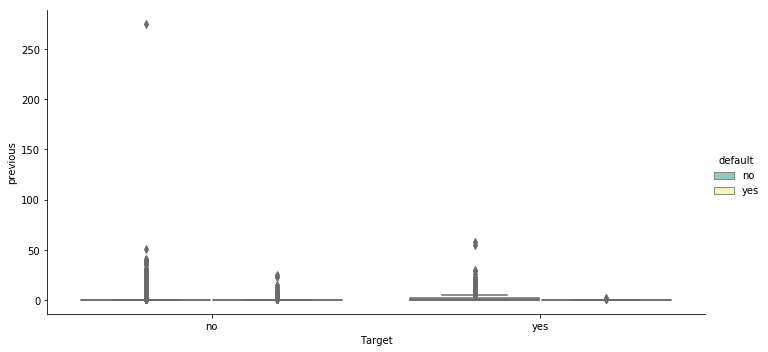

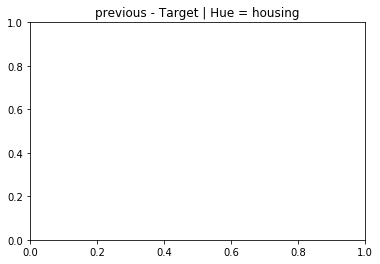

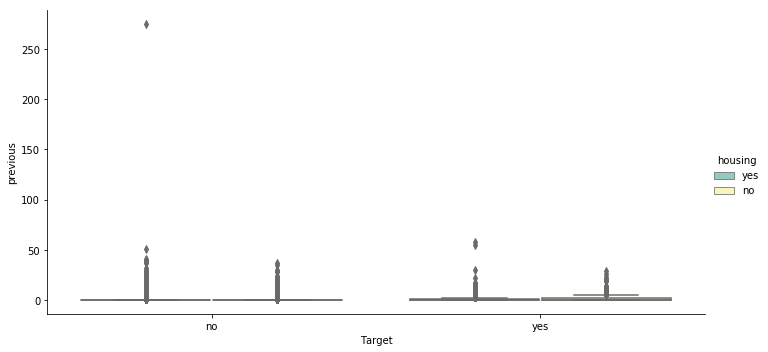

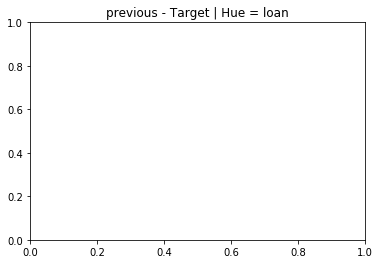

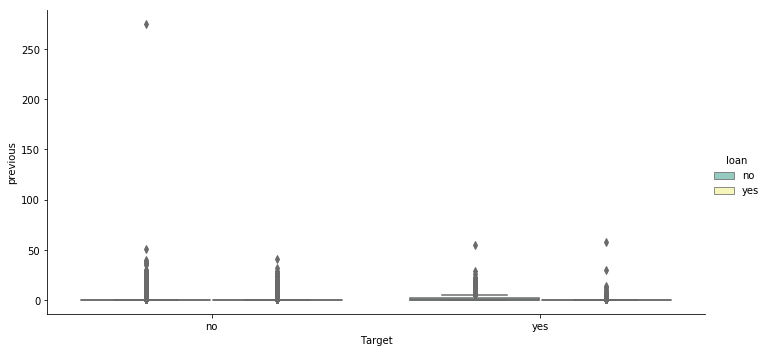

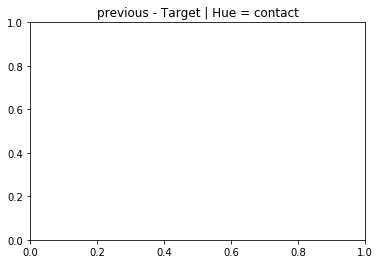

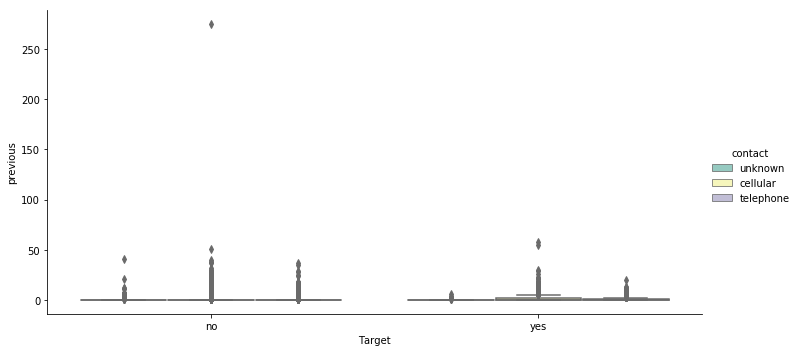

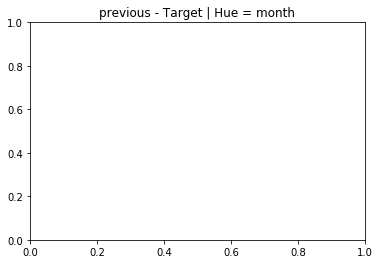

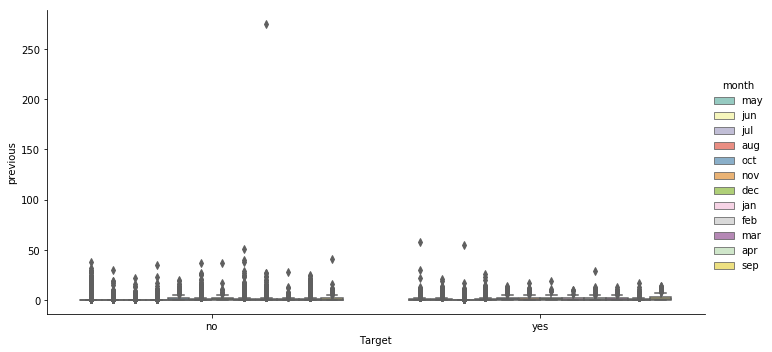

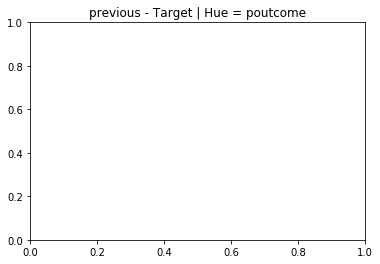

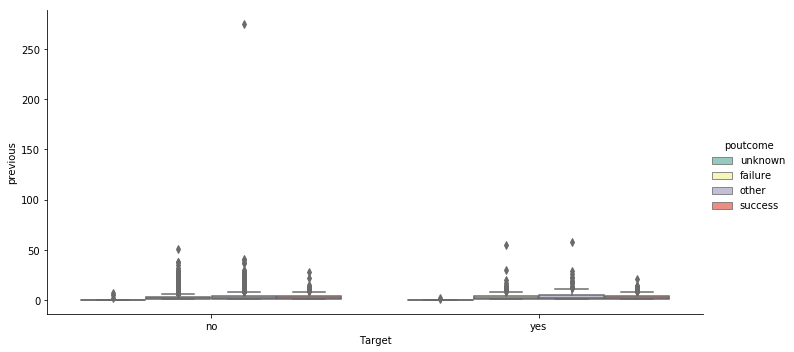

In [18]:
# 2. In the plots against Personal loan pplot with hue for all other C variables
for j in ['age','balance','day','campaign','pdays','previous']:
    for i in ['job', 'marital', 'education', 'default', 'housing','loan','contact','month','poutcome']:
        plt.figure()
        plt.title(j+" - Target | Hue = "+i)
        sns.catplot(y=j,x='Target',data=Data,hue=i,kind= "box", aspect=2,palette = 'Set3')
        
     

Some useful Inferences:
1. Old age person of age more then 65 definately subcribes for term deposit.
2. In month of January towards the end that is when date is 25 or more nobody tends to take the term deposit.

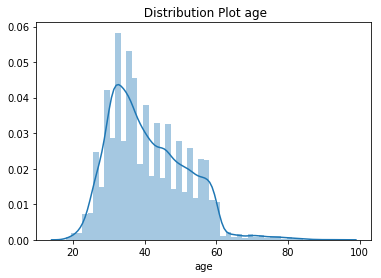

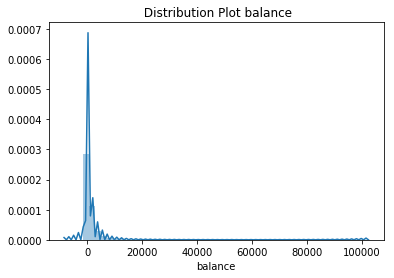

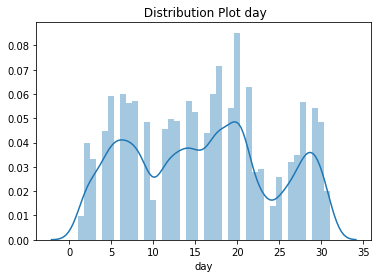

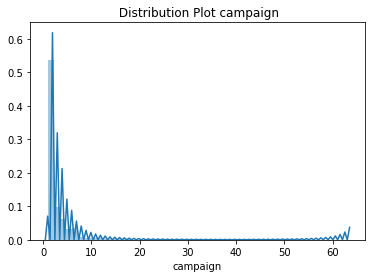

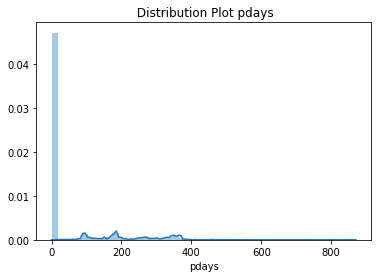

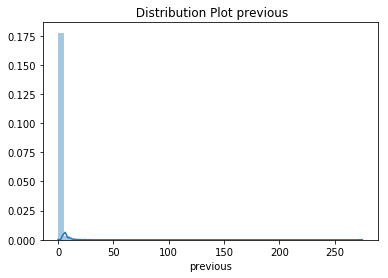

In [19]:
 for i in ['age','balance','day','campaign','pdays','previous']:
        plt.figure()
        plt.title(" Distribution Plot "+i )
        sns.distplot(Data[i])

Distribution Plot of age is right skewed stating that most of the people under study falls into range of 20 to 65.

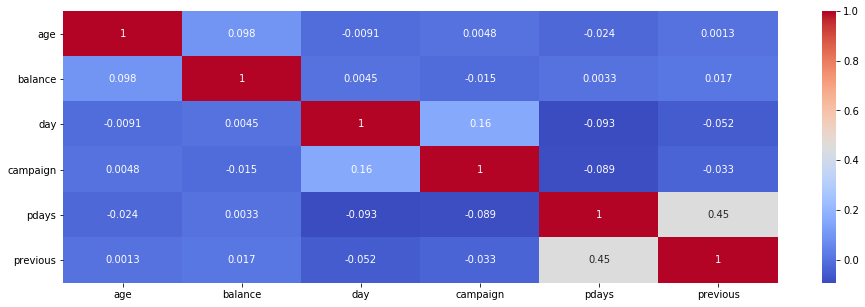

In [20]:

plt.figure(figsize=(16,5))
sns.heatmap(Data.corr(),cmap = 'coolwarm', annot=True)
 

Observations

Meaningful relationships

1. Not much effective correlation. pdays and previous has lil bit of medium  relationship.

2. Duration-Day, pdays-duration,pdays- campaign and previous-camapign are strongly negatively corelated
which means increase in value of one affects the happening of other.

-----------------------------------------------------------------------------------------------

In [22]:
#To know how many categories are present per coloumn
Data.loc[:, Data.dtypes == np.object].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
Target        2
dtype: int64

In [23]:
Data.loc[Data['Target']== 'yes', 'Target']=1
Data.loc[Data['Target']== 'no', 'Target']=0
Data.groupby("Target").agg({'Target': 'count'})

,Target
Target,
0,39922
1,5289


In [24]:
 #'admin.','blue-collar','entrepreneur','housemaid'
# ,'manage ment','retired','self-employed','services','student','technicia n','unemployed','unknown')
Data.loc[Data['job']== 'admin.', 'job']=1
Data.loc[Data['job']== 'blue-collar', 'job']=2
Data.loc[Data['job']== 'entrepreneur', 'job']=3
Data.loc[Data['job']== 'housemaid', 'job']=3
Data.loc[Data['job']== 'management', 'job']=5
Data.loc[Data['job']== 'retired', 'job']=6
Data.loc[Data['job']== 'self-employed', 'job']=7
Data.loc[Data['job']== 'services', 'job']=8
Data.loc[Data['job']== 'student', 'job']=9
Data.loc[Data['job']== 'technician', 'job']=10
Data.loc[Data['job']== 'unemployed', 'job']=11
Data.loc[Data['job']== 'unknown', 'job']=12

Data.groupby("job").agg({'job': 'count'})

,job
job,
1,5171
2,9732
3,2727
5,9458
6,2264
7,1579
8,4154
9,938
10,7597


In [25]:
#3.marital:marital status 
#(categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
Data.loc[Data['marital']=='divorced', 'marital']=1
Data.loc[Data['marital']=='widowed', 'marital']=1
Data.loc[Data['marital']=='married', 'marital']=2
Data.loc[Data['marital']== 'single', 'marital']=3
Data.loc[Data['marital']=='unknown', 'marital']=4
Data.groupby("marital").agg({'marital': 'count'})

,marital
marital,
1,5207
2,27214
3,12790


In [26]:
Data[Data['marital']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target


In [27]:
#4.education (categorical: 
#'basic.4y','basic.6y','basic.9y','high.school','illiterate','profes sional.course','university.degree','unknown')
Data.loc[Data['education']== 'primary','education']=1
Data.loc[Data['education']== 'secondary','education']=2
Data.loc[Data['education']== 'tertiary','education']=3
Data.loc[Data['education']== 'unknown','education']=4
Data.groupby('education').agg({'education':'count'})

,education
education,
1,6851
2,23202
3,13301
4,1857


In [28]:
#default: has credit in default? (categorical: 'no','yes','unknown')
Data.loc[Data['default']== 'yes', 'default'] =1
Data.loc[Data['default']== 'no', 'default'] =0
Data.loc[Data['default']== 'unknown', 'default'] =2
Data.groupby('default').agg({'default':'count'})

,default
default,
0,44396
1,815


In [29]:
#housing: has housing loan? (categorical: 'no','yes','unknown')
Data.loc[Data['housing']== 'yes', 'housing'] =1
Data.loc[Data['housing']== 'no', 'housing'] =0
Data.loc[Data['housing']== 'unknown', 'housing'] =2
Data.groupby('housing').agg({'housing':'count'})

,housing
housing,
0,20081
1,25130


In [32]:
Data[Data['housing']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target


In [33]:
#loan: has personal loan? (categorical: 'no','yes','unknown')

Data.loc[Data['loan']== 'yes', 'loan'] =1
Data.loc[Data['loan']== 'no', 'loan'] =0
Data.loc[Data['loan']== 'unknown', 'loan'] =2
Data.groupby('loan').agg({'loan':'count'})

,loan
loan,
0,37967
1,7244


In [34]:
#contact: contact communication type (categorical: 'cellular','telephone')
Data.loc[Data['contact']== 'cellular', 'contact'] =1
Data.loc[Data['contact']== 'telephone', 'contact'] =2
Data.loc[Data['contact']== 'unknown', 'contact'] =3
Data.groupby('contact').agg({'contact':'count'})

,contact
contact,
1,29285
2,2906
3,13020


In [35]:
#month: last contact month of year (categorical: 'jan', 'feb','mar', ..., 'nov', 'dec')
Data.loc[Data['month']== 'jan','month']=1
Data.loc[Data['month']== 'feb','month']=2
Data.loc[Data['month']== 'mar','month']=3
Data.loc[Data['month']== 'apr','month']=4
Data.loc[Data['month']== 'may','month']=5
Data.loc[Data['month']== 'jun','month']=6
Data.loc[Data['month']== 'jul','month']=7
Data.loc[Data['month']== 'aug','month']=8
Data.loc[Data['month']== 'sep','month']=9
Data.loc[Data['month']== 'oct','month']= 10
Data.loc[Data['month']== 'nov','month']=11
Data.loc[Data['month']== 'dec','month']=12
Data.groupby('month').agg({'month':'count'})

,month
month,
1,1403
2,2649
3,477
4,2932
5,13766
6,5341
7,6895
8,6247
9,579


In [36]:
# poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Data.loc[Data['poutcome']== 'failure', 'poutcome'] =0
Data.loc[Data['poutcome']== 'success', 'poutcome'] =1
Data.loc[Data['poutcome']== 'unknown', 'poutcome'] =2
Data.loc[Data['poutcome']== 'other', 'poutcome'] =2
Data.groupby('poutcome').agg({'poutcome':'count'})

,poutcome
poutcome,
0,4901
1,1511
2,38799


In [70]:
Data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
45201,53,5,2,3,0,583,0,0,1,17,11,1,1.840000e+02,4,1
45202,34,1,3,2,0,557,0,0,1,17,11,1,2.220446e-16,0,2
45203,23,9,3,3,0,113,0,0,1,17,11,1,2.220446e-16,0,2
45204,73,6,2,2,0,2850,0,0,1,17,11,1,4.000000e+01,8,0
45205,25,10,3,2,0,505,0,1,1,17,11,2,2.220446e-16,0,2
45206,51,10,2,3,0,825,0,0,1,17,11,3,2.220446e-16,0,2
45207,71,6,1,1,0,1729,0,0,1,17,11,2,2.220446e-16,0,2
45208,72,6,2,2,0,5715,0,0,1,17,11,5,1.840000e+02,3,1
45209,57,2,2,2,0,668,0,0,2,17,11,4,2.220446e-16,0,2
45210,37,3,2,2,0,2971,0,0,1,17,11,2,1.880000e+02,11,2


In [38]:
# splitting data into training and test set for independent attributes
X =Data.drop("Target" , axis=1)
y = Data.pop("Target")

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
# Scoring decision tree
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.8337511058684753


Result shows over fitting of data points

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

In [47]:
#Visualising the Decision Tree

from sklearn import tree
train_char_label = ['No', 'Yes']
Bank_File = open('bank.dot','w')
dot_data = tree.export_graphviz(dt, out_file=Bank_File, feature_names = list(X_train), class_names = list(train_char_label))
Bank_File.close()

In [48]:
  
retCode = system("dot -Tpng bankloan_tree.dot -o bank_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Bank_tree.png"))

system command returning error: 1



#"dot" command is not working hence viewed graph on website http://webgraphviz.com/

In [55]:
#Reducing overfitting of data
dtReduced = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dtReduced.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8870035074414636
0.8893394278973754


In [52]:
train_char_label = ['No', 'Yes']
BankTreeReduced = open('banktreereduced.dot','w')
dot_data = tree.export_graphviz(dt, out_file=BankTreeReduced, feature_names = list(X_train), class_names = list(train_char_label))
BankTreeReduced.close()


#"dot" command is not working hence viewed graph on website http://webgraphviz.com/

dt.score(test_set , test_labels)
test_pred = dt.predict(test_set)

In [57]:
#Calculating Gini Importance of the Features
print (pd.DataFrame(dtReduced.feature_importances_, columns = ["GiniImp"], index = X_train.columns))

                Imp
age        0.128113
job        0.000000
marital    0.008036
education  0.000000
default    0.000000
balance    0.000000
housing    0.302947
loan       0.000000
contact    0.081933
day        0.000000
month      0.000000
campaign   0.000000
pdays      0.308189
previous   0.000000
poutcome   0.170782


0.8893394278973754


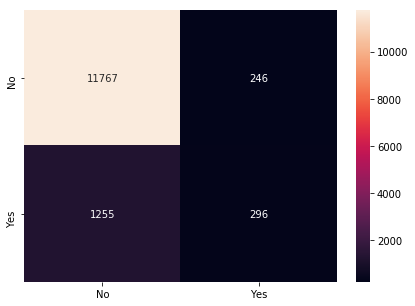

In [60]:
from sklearn import metrics
print(dtReduced.score(X_test , y_test))
y_predict = dtReduced.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

#df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
#                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [62]:
# Ensemble Learning - Bagging
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


0.8947213211442052


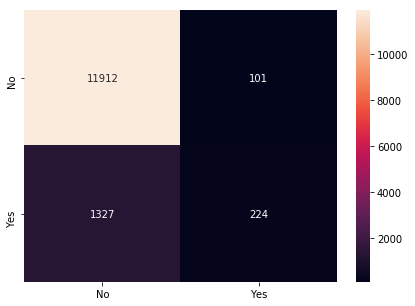

In [63]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [64]:

#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8937629017988794


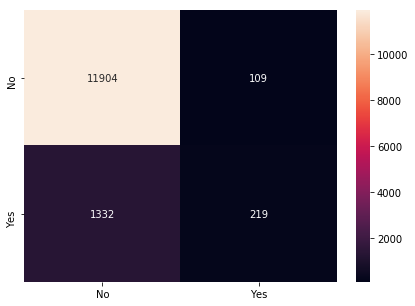

In [65]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [66]:
#GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.8945001474491301


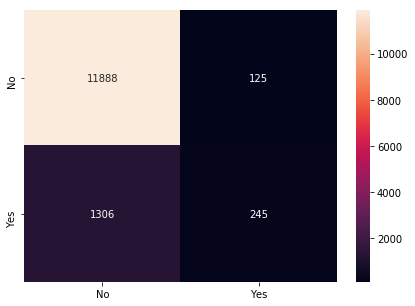

In [67]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [68]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.8890445296372751


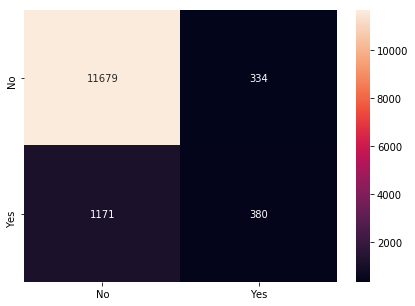

In [69]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
Inference

In terms of True positive and False Positives Baggigng showed best result with 89.4 percent accuracy.